In [58]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sn
from IPython.display import display_html
import scipy
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

- Since we don't have the same features in all the dataset (2015-2019)
     We decided to focus our work on the data of the years: 2015 & 2016

In [39]:
d2015 = pd.read_csv(r'2015.csv')
d2016 = pd.read_csv(r'2016.csv')

#### Data Preprocessing

In [40]:
d2015['Year'] = 2015
d2016['Year'] = 2016

d2016 = d2016.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis = 1)
d2015 = d2015.drop(['Standard Error'], axis = 1)

d2015 = d2015.rename(columns = {'Happiness Rank' : 'Rank', 'Happiness Score' : 'Score', 'Health (Life Expectancy)' : 'Life Expectancy', 'Freedom to make life choices' : 'Freedom', 'Trust (Government Corruption)' : 'Trust', })
d2016 = d2016.rename(columns = {'Country or region' : 'Country', 'GDP per capita' : 'GDP', 'Healthy life expectancy' : 'Life expectancy', 'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'Trust', })




In [41]:
data = pd.concat([d2015, d2016], axis = 0)

In [42]:
data.head(3)

,Country,Region,Rank,Score,Economy (GDP per Capita),Family,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual,Year,Happiness Rank,Happiness Score,Health (Life Expectancy),Trust (Government Corruption)
0,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN


##### Meaning of the variables

- GDP per capita:GDP per capita is a measure of a country's economic output that accounts for its number of people.
- Social support:Social support means having friends and other people, including family, to turn to in times of need or crisis to give you a broader focus and positive self-image. Social support enhances quality of life and provides a buffer against adverse life events.
- Healthy life expectancy:Healthy Life Expectancy is the average number of years that a newborn can expect to live in "full health"—in other words, not hampered by disabling illnesses or injuries.
- Freedom to make life choices:Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.
- Generosity:the quality of being kind and generous.
- Perceptions of corruption:The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995 which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.

In [43]:
new_names = ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual', 'Year']
d2015.columns = new_names
d2016.columns = new_names

In [44]:
data = pd.concat([d2015, d2016])

In [45]:
data.dropna(axis = 0, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 156
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            315 non-null    object 
 1   Region             315 non-null    object 
 2   Happiness Rank     315 non-null    int64  
 3   Happiness Score    315 non-null    float64
 4   GDP                315 non-null    float64
 5   Family             315 non-null    float64
 6   Life Expectancy    315 non-null    float64
 7   Freedom            315 non-null    float64
 8   Trust              315 non-null    float64
 9   Generosity         315 non-null    float64
 10  Dystopia Residual  315 non-null    float64
 11  Year               315 non-null    int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 32.0+ KB


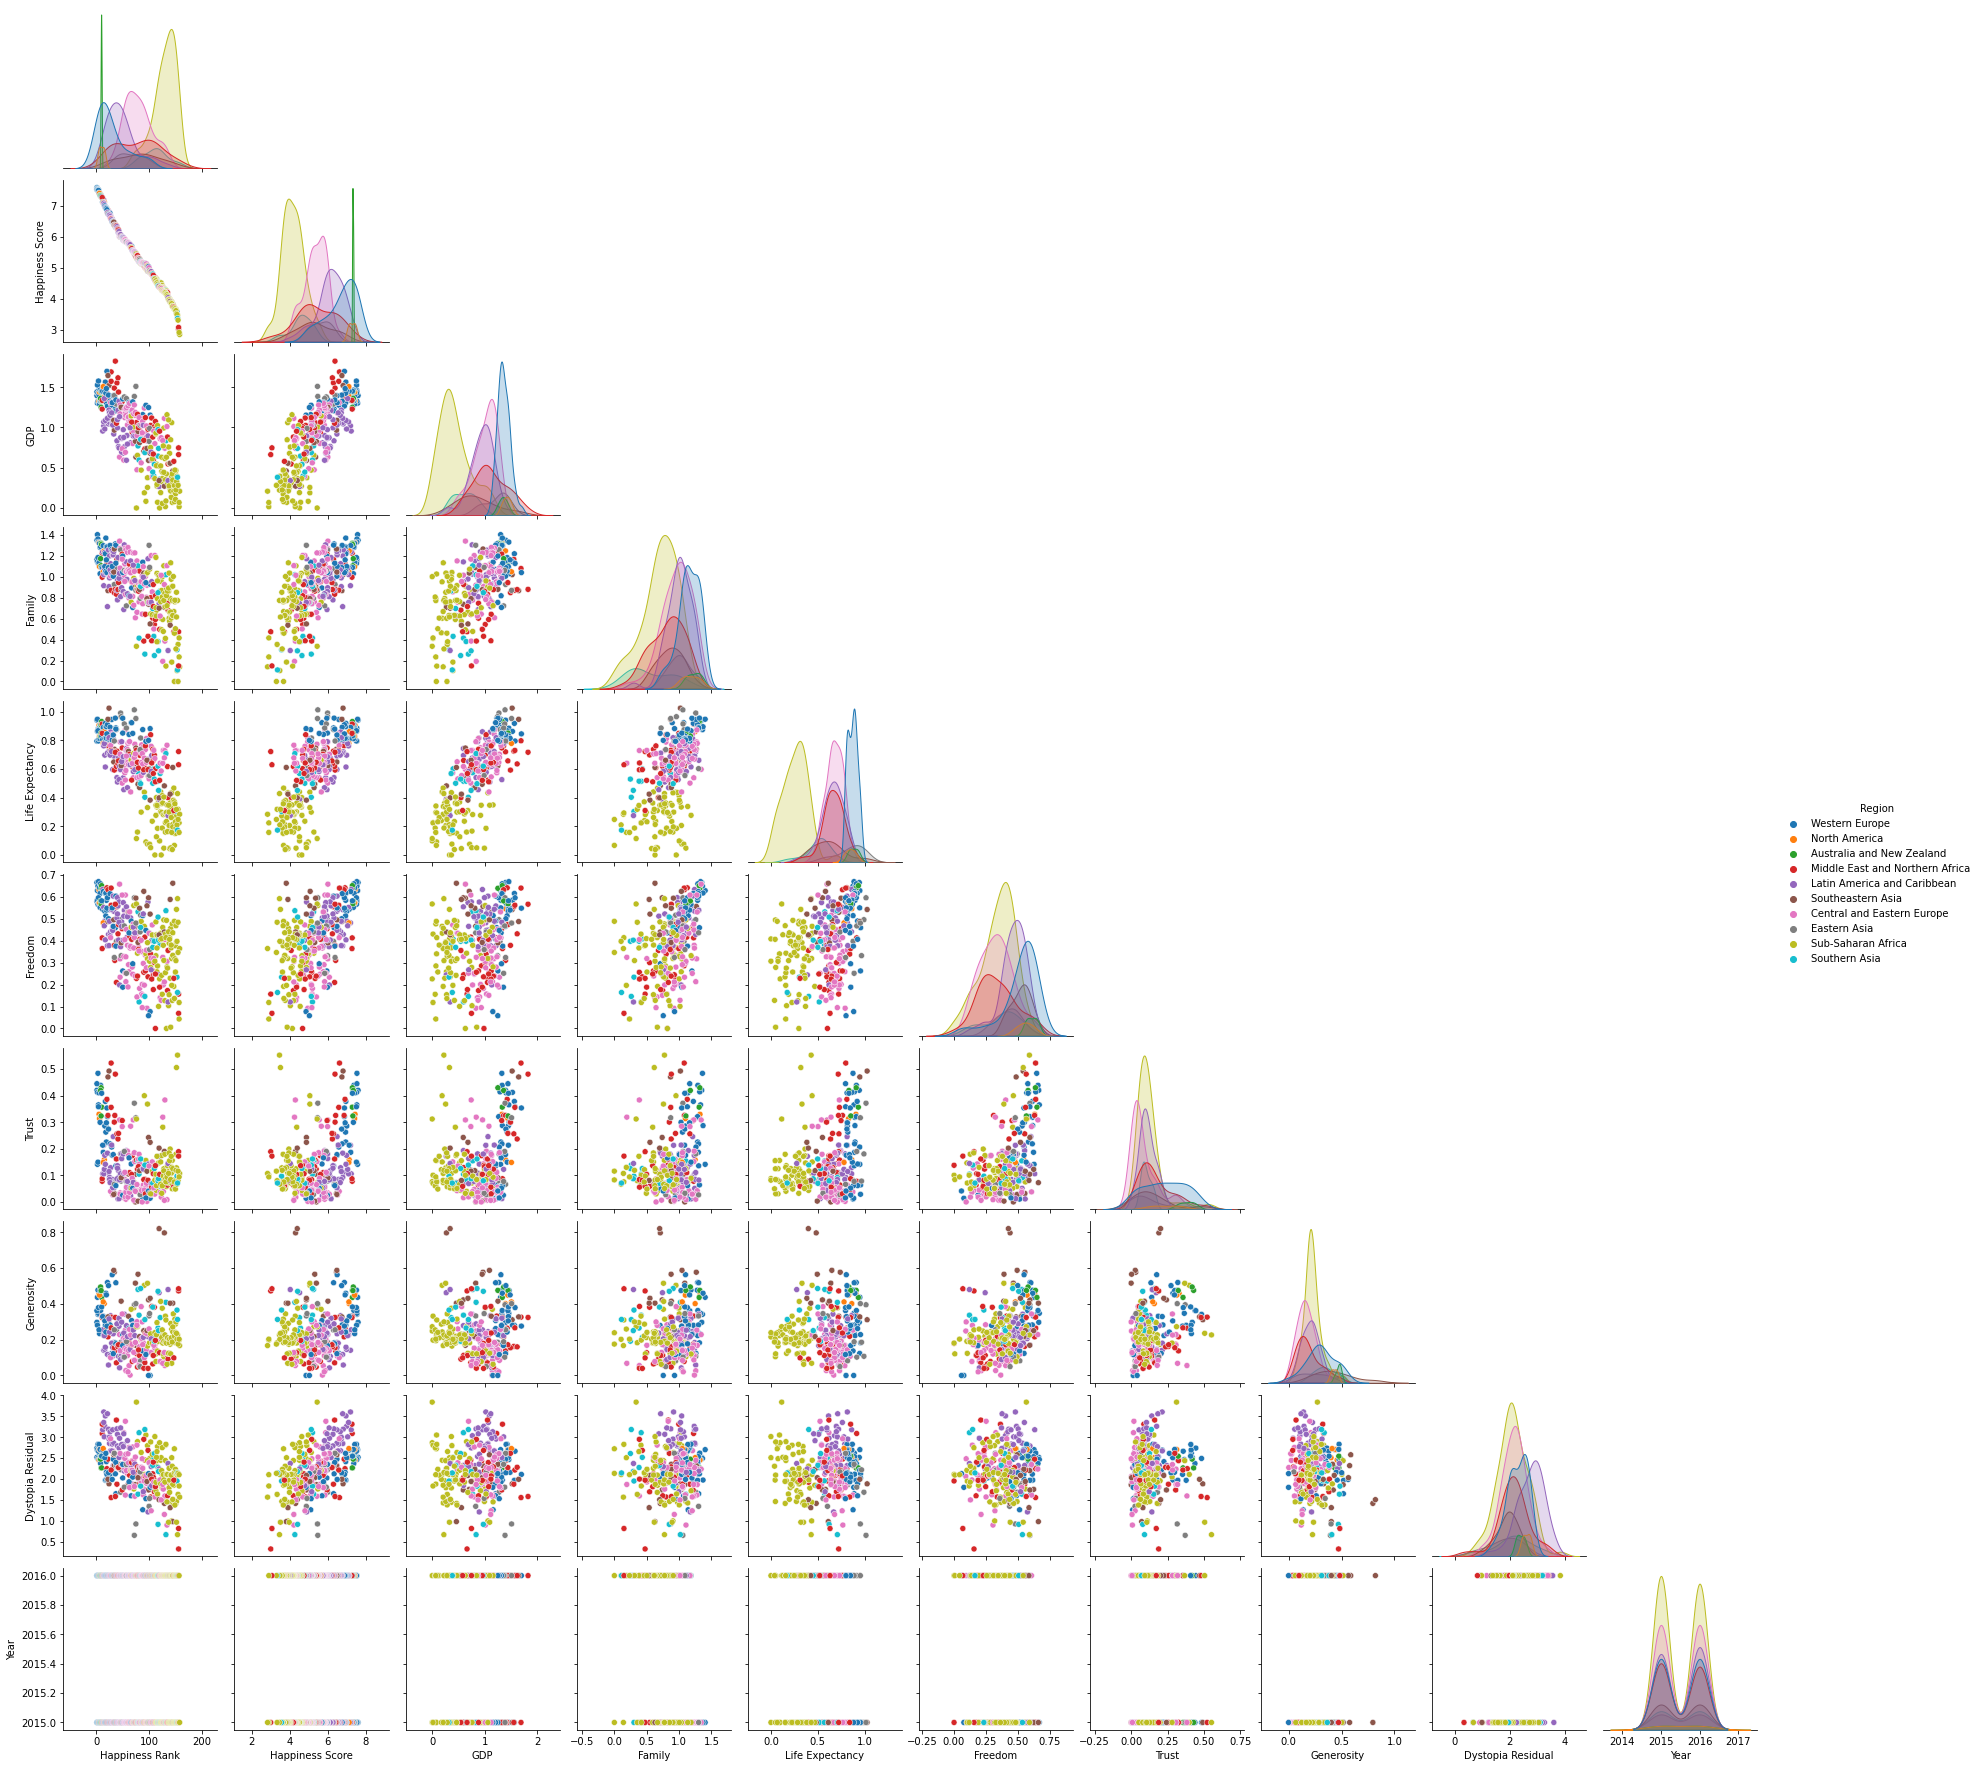

In [46]:
sn.pairplot(data, hue='Region', corner = True)

In [47]:
fig = px.scatter(d2015, x = 'Happiness Score', y = 'GDP', text = 'Country', title = 'GDP VS Happiness Score in the year 2015')
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 1000, 
                  width = 1000)
fig.show()

- Data sorted by country's happiness rank 

In [48]:
fig = px.bar(d2015, x = 'Country', y = 'GDP')
fig.update_layout(uniformtext_minsize=8,
                  uniformtext_mode='hide',
                  height = 500,
                  width = 1000)
fig.show()

In [49]:
def display_side_by_side(*args):
    "function which will allow us to display two dataframes side by side"
    
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table', 'table style ="display : inline"'), raw = True)


In [50]:
data_score_description = data.groupby(by = 'Year')['Happiness Score'].describe()
data_GDP_description = data.groupby(by = 'Year')['GDP'].describe()

display_side_by_side(data_score_description, data_GDP_description)


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.0,5.375734,1.145010,2.839,4.526,5.2325,6.24375,7.587
2016,157.0,5.382185,1.141674,2.905,4.404,5.3140,6.26900,7.526
,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.0,0.846137,0.403121,0.0,0.545808,0.910245,1.158448,1.69042
2016,157.0,0.953880,0.412595,0.0,0.670240,1.027800,1.279640,1.82427


- From the year 2015 to 2019, we notice that when the mean of the GDP rose by ~0.1 the mean of the happiness score rose by ~0.01

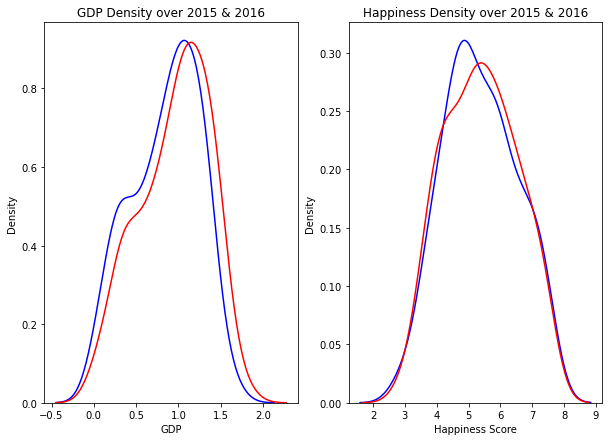

In [51]:
# Let's see how the distribution of these two factors are altering over the years 2015 & 2016
plt.figure(figsize = (10,7))
plt.subplot(1,2,1)
sn.kdeplot(d2015['GDP'], color = 'blue')
sn.kdeplot(d2016['GDP'], color = 'red')
plt.title('GDP Density over 2015 & 2016')

plt.subplot(1,2,2)
sn.kdeplot(d2015['Happiness Score'], color = 'blue')
sn.kdeplot(d2016['Happiness Score'], color = 'red')
plt.title('Happiness Density over 2015 & 2016')
plt.show()

- From the year 2015 to 2019, we notice that when the mean of the GDP rose by ~0.1 the mean of the happiness score rose by ~0.01

In [52]:
# Let's continue the analysis by exploring the other factors
# First we group the data by the year, and average the factors

data_grouped = data.groupby(by = 'Year')[['Happiness Score', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].mean().reset_index()

# Here we reconstruct the dataframe by using the melt() method

data_grouped = pd.melt(frame = data_grouped,
                       id_vars = 'Year', # The variable for which each factor is gonna be grouped
                       value_vars = ['Happiness Score', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'],
                       var_name = 'Factor',
                       value_name = 'Average Value')


<AxesSubplot:xlabel='Factor', ylabel='Average Value'>

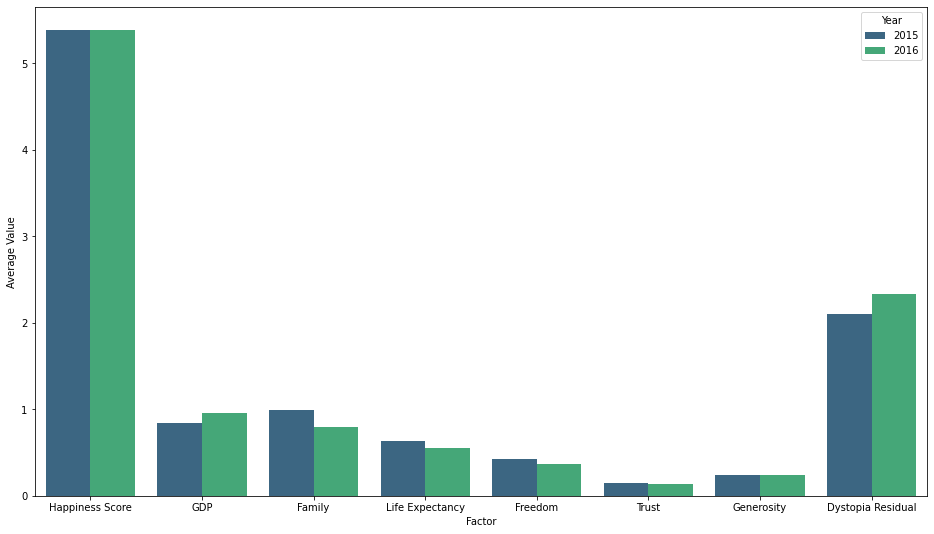

In [53]:
plt.figure(figsize = (16, 9 ))
sn.barplot(x = data_grouped['Factor'], 
           y = data_grouped['Average Value'], 
           hue = data_grouped['Year'],
           palette = "viridis")

In [54]:
# Let's find out which country is the happiest in the year 2016

happiest_2016 = data[data['Year'] == 2016].groupby(by = ['Country'])['Happiness Score'].mean().reset_index()
happiest_2016 = happiest_2016.sort_values(by = 'Happiness Score', ascending = False).head(10)

saddest_2016 = data[data['Year'] == 2016].groupby(by = ['Country'])['Happiness Score'].mean().reset_index()
saddest_2016 = saddest_2016.sort_values(by = 'Happiness Score', ascending = True).head(10)
display_side_by_side(happiest_2016, saddest_2016)

,Country,Happiness Score
37,Denmark,7.526
134,Switzerland,7.509
57,Iceland,7.501
103,Norway,7.498
44,Finland,7.413
25,Canada,7.404
97,Netherlands,7.339
98,New Zealand,7.334
6,Australia,7.313
133,Sweden,7.291


<AxesSubplot:xlabel='Happiness Score', ylabel='Country'>

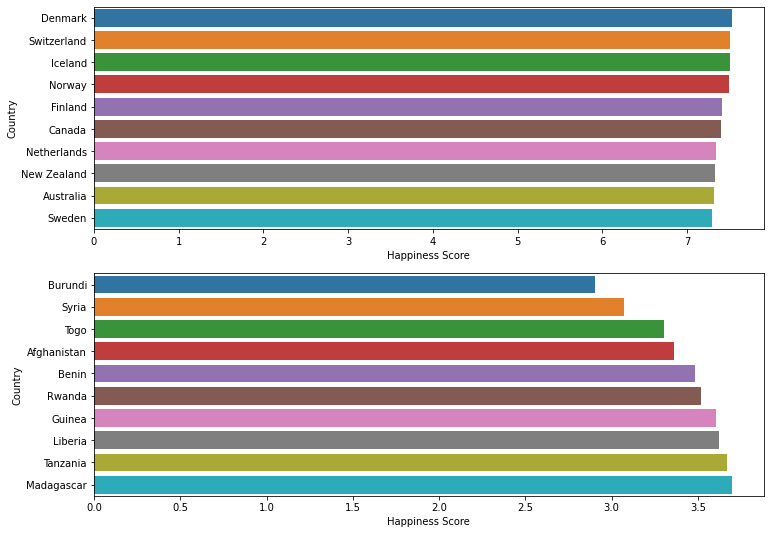

In [55]:
plt.figure(figsize = (12, 9))
plt.subplot(2,1,1)
sn.barplot(x = happiest_2016['Happiness Score'], y = happiest_2016['Country'])
plt.subplot(2,1,2)
sn.barplot(x = saddest_2016['Happiness Score'], y = saddest_2016['Country'])

- Nothing surprising here either. Countries in war zones or with poor sanitation systems, diseases or very poor infrastructure are the least happy people out of all.

Let's find out which factor influences the happiness score the most

In the following, as a metric, we're going to adopt the Pearson correlation coefficient PCC or bivariate correlation is a statistic that measures linear correlation between two variables and outputs the correlation coefficient between [-1, +1]

- Calculating the Pearson Correlation between the Happiness Score and other factors


In [56]:
coef1 = scipy.stats.pearsonr(data['Happiness Score'], data['GDP'])
coef2 = scipy.stats.pearsonr(data['Happiness Score'], data['Family'])
coef3 = scipy.stats.pearsonr(data['Happiness Score'], data['Life Expectancy'])
coef4 = scipy.stats.pearsonr(data['Happiness Score'], data['Freedom'])
coef5 = scipy.stats.pearsonr(data['Happiness Score'], data['Generosity'])
coef6 = scipy.stats.pearsonr(data['Happiness Score'], data['Trust'])

print('\t\tPearson Correlation Coefficient (PCC)\n')
print('PCC of Happiness Score & GDP : %f' % round(coef1[0], 2))
print('PCC of Happiness Score & Life Expectancy : %f' % round(coef3[0], 2))
print('PCC of Happiness Score & Family : %f' % round(coef2[0], 2))
print('PCC of Happiness Score & Freedom : %f' % round(coef4[0], 2))
print('PCC of Happiness Score & Trust : %f' % round(coef6[0], 2))
print('PCC of Happiness Score & Generosity : %f' % round(coef5[0], 2))



		Pearson Correlation Coefficient (PCC)

PCC of Happiness Score & GDP : 0.780000
PCC of Happiness Score & Life Expectancy : 0.730000
PCC of Happiness Score & Family : 0.690000
PCC of Happiness Score & Freedom : 0.560000
PCC of Happiness Score & Trust : 0.400000
PCC of Happiness Score & Generosity : 0.170000


- We can notice that the economy & health have a strong correlation with the happiness score

###### Correlation Heatmap

- We use a mask to eliminate the upper triangle
- np.ones_like gives an array of ones of the same shape of data.corr(); but with the dtype(np.bool) instead of ones
- np.triu gives the elements under the diagonal

<AxesSubplot:>

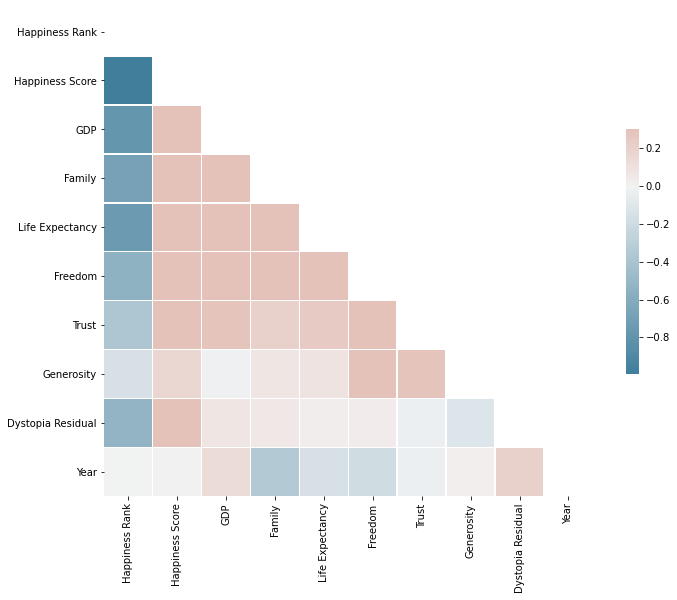

In [57]:
mask = np.triu(np.ones_like(data.corr(), dtype = np.bool))

f, ax = plt.subplots(figsize = (12, 9))

cmap = sn.diverging_palette(230, 20, as_cmap = True)

sn.heatmap(data.corr(), mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidth = .5, cbar_kws ={"shrink": .5})

- Finally it seems that happiness is highly and mainly influenced by GDP (the green bucks) with a strong positive correlation and health (cannot enjoy the money without it :D) 